# ***Remaking of wandb plots***

### Contents:
* [OC plots experiments](#first-bullet)
* [Bandits plots experiments](#second-bullet)
* [RL plots experiments](#third-bullet)

In [1]:
import wandb
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

api = wandb.Api()

plt.show(block=False)

In [2]:
gene_names_dict = {
    0: 'Cdkn2a', 1: 'Xist', 2: 'Sox2', 3: 'Nanog', 4: 'Tdgf1', 5: 'Zfp42', 6: 'Fmr1nb', 7: 'Ooep', 8: 'Tcl1',
    9: 'Obox6', 10: 'Klf4', 11: 'Esrrb', 12: 'Dppa4', 13: 'Myc', 14: 'Lncenc1', 15: 'Sohlh2', 16: 'Pou5f1', 17: 'Gdf9'
}

five_actions = [gene_names_dict[2],gene_names_dict[11],gene_names_dict[10],gene_names_dict[0],gene_names_dict[5]]

## OC <a class="anchor" id="first-bullet"></a>

In [3]:
# runs = api.runs("control-grn/OC")
runs = {"steer1": "control-grn/OC/ms7icnsr", "steer0":"control-grn/OC/10od2ku3"}

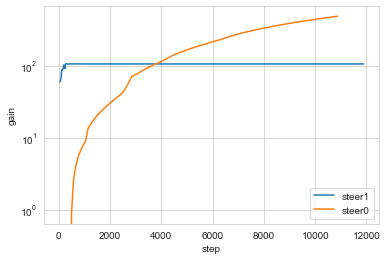

In [6]:
hist_list = [] 
for legend, _id in runs.items(): 
    run = api.run(_id)
    hist = run.history(keys=['metrics/gain'])
    hist['legend'] = legend
    hist_list.append(hist)

df = pd.concat(hist_list, ignore_index=True)
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="metrics/gain", hue="legend", data=df)
ax.set(ylabel='gain', xlabel='step')
ax.set(yscale='log')
plt.legend(loc='lower right')
plt.savefig("./thesis-recreate-figures/pdfs/OC/gain_OC_both_steer0and1.pdf") 
plt.show()

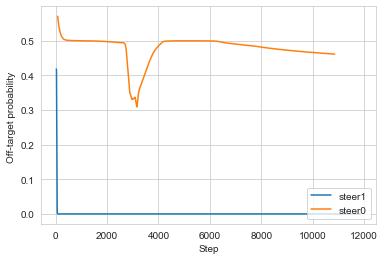

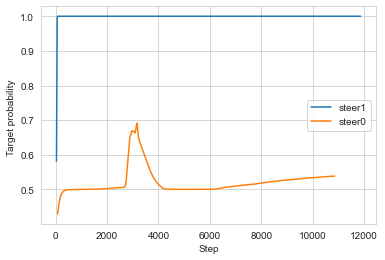

In [7]:
hist_list = [] 
for legend, _id in runs.items(): 
    run = api.run(_id)
    hist = run.history(keys=['p/off_target_class_prob', 'p/target_class_prob'])
    hist['legend'] = legend
    hist_list.append(hist)

df = pd.concat(hist_list, ignore_index=True)
sns.set_style('whitegrid')

ax = sns.lineplot(x="_step", y="p/off_target_class_prob", hue="legend", data=df)
ax.set(ylabel='Off-target probability ', xlabel='Step')
# ax.set(yscale='log')

plt.legend(loc='lower right')
plt.savefig("./thesis-recreate-figures/pdfs/OC/off_target_prob_OC_both_steer0and1.pdf") 
plt.show()

ax = sns.lineplot(x="_step", y="p/target_class_prob", hue="legend", data=df)
ax.set(ylabel='Target probability ', xlabel='Step')
# ax.set(yscale='log')
plt.legend(loc='center right')
plt.savefig("./thesis-recreate-figures/pdfs/OC/target_prob_OC_both_steer0and1.pdf")
plt.show()

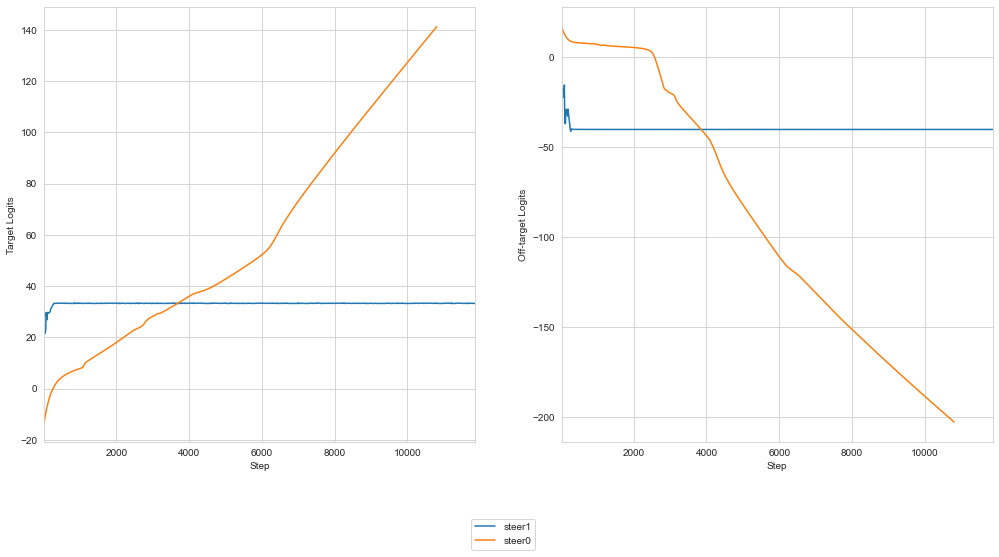

In [8]:
keys=['logits/target_class.mean()', 'logits/not_target_class.mean()']
hist_list = [] 
for legend, _id in runs.items(): 
    run = api.run(_id)
    hist = run.history(keys=keys)
    hist['legend'] = legend
    hist_list.append(hist)

df = pd.concat(hist_list, ignore_index=True)
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(17,8))
for i in range(2):
    ax = sns.lineplot(ax=axes[i], x="_step", y=keys[i], hue="legend", data=df)
    ax.set(ylabel='Target Logits' if not 'not' in keys[i] else 'Off-target Logits', xlabel='Step')
    ax.margins(x=0)
    ax.get_legend().remove()
    
labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
  bbox_to_anchor = (0.5, 0),
  bbox_transform = plt.gcf().transFigure,
)    
# plt.legend(loc='center right')
plt.savefig("./thesis-recreate-figures/pdfs/OC/logits_OC_both_steer0and1.pdf")
plt.show()

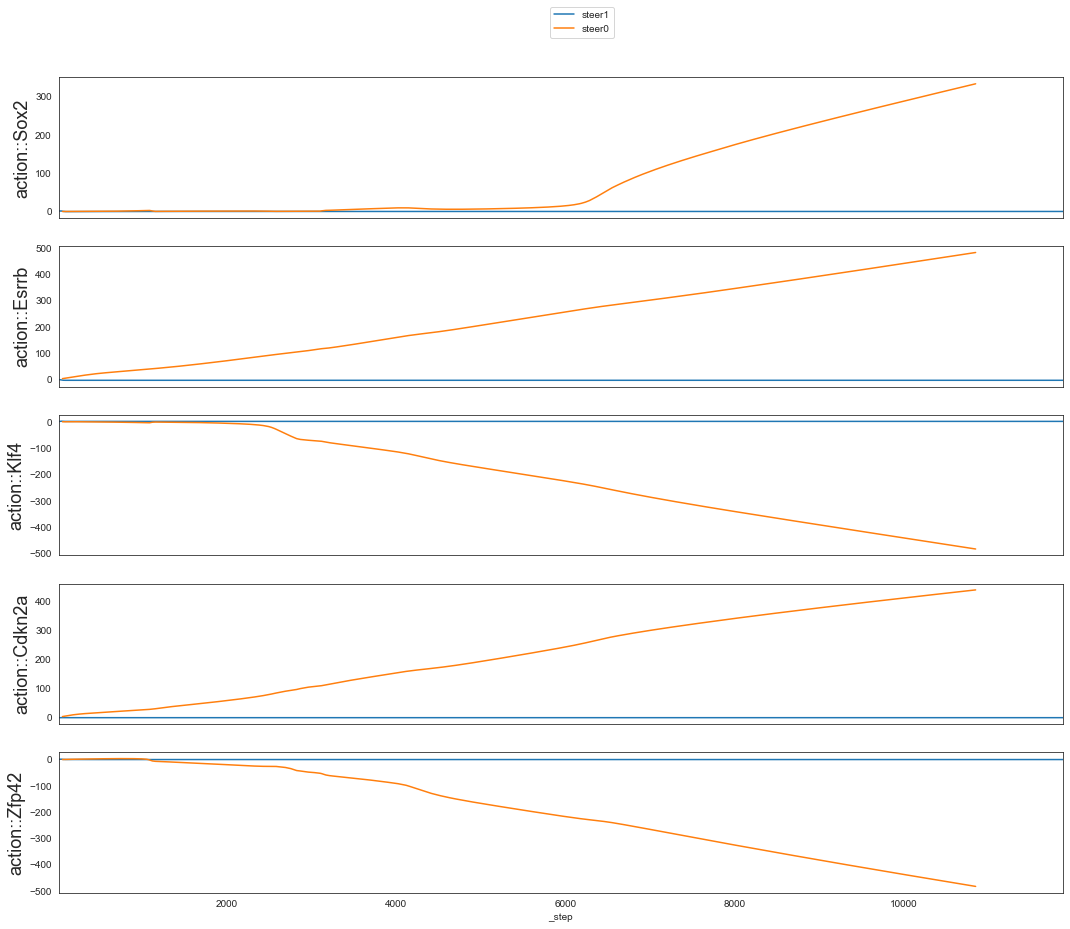

In [9]:
sns.set_style('white')# {darkgrid, whitegrid, dark, white, ticks}
keys=[f'actions/{gene}' for gene in five_actions] #, 'logits/not_target_class.mean()']
hist_list = [] 
for legend, _id in runs.items(): 
    run = api.run(_id)
    hist = run.history(keys=keys)
    hist['legend'] = legend
    hist_list.append(hist)

df = pd.concat(hist_list, ignore_index=True)

fig, axes = plt.subplots(5, 1, figsize=(18,15), sharex=True)
for i in range(5):
    ax = sns.lineplot(ax=axes[i] ,x="_step", y=keys[i], hue="legend", data=df) # , legend=False)
    ax.set_ylabel(ylabel=f"action::{keys[i].split('/')[1]}", fontsize=18) # , xlabel='Step')
    # ax.set(yscale='log') 
    ax.margins(x=0)
    ax.get_legend().remove()

# fig.delaxes(axes[1,2])  
# 

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper left",
  bbox_to_anchor = (0.5, 0.95),
  bbox_transform = plt.gcf().transFigure,
)
# plt.legend(loc='lower left')
# plt.tick_params(labelsize=14)
plt.savefig("./thesis-recreate-figures/pdfs/OC/actions_OC_both_steer0and1.pdf")
plt.show()

## Bandits <a class="anchor" id="second-bullet"></a>

In [2]:
runs = api.runs("control-grn/context-bandits")

In [55]:
reward_steer0_hist_list = [] 
reward_steer1_hist_list = [] 

for run in runs:
    hist = run.history(keys=['rollout/ep_rew_mean'])
    hist['legend'] = run.config['algo']
    
    if 'steer0' in run.name:
        reward_steer0_hist_list.append(hist)
    if 'steer1' in run.name and '2M' in run.name:
        reward_steer1_hist_list.append(hist)

In [56]:
len(reward_steer0_hist_list), len(reward_steer1_hist_list)

(5, 5)

In [57]:
steer0_df = pd.concat(reward_steer0_hist_list, ignore_index=True)  
steer1_df = pd.concat(reward_steer1_hist_list, ignore_index=True)  

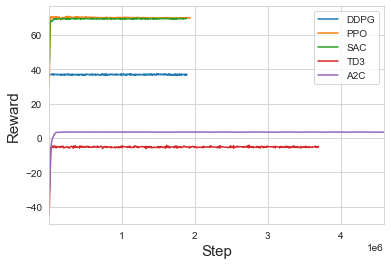

In [63]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="rollout/ep_rew_mean", hue="legend", data=steer0_df)
ax.set_ylabel('Reward', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='upper right')
plt.savefig("./thesis-recreate-figures/reward__steer0_bandits.png", dpi=400)
plt.show()

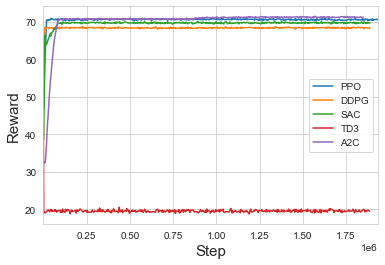

In [66]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="rollout/ep_rew_mean", hue="legend", data=steer1_df)
ax.set_ylabel('Reward', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='center right')
plt.savefig("./thesis-recreate-figures/reward__steer1_bandits.png", dpi=400)
plt.show()

In [3]:
# logits plot

logits_steer0_hist_list = [] 
logits_steer1_hist_list = [] 

for run in runs:
    hist = run.history(keys=['logits/target_class.mean()'])
    hist['legend'] = run.config['algo']
    
    if 'steer0' in run.name:
        logits_steer0_hist_list.append(hist)
    if 'steer1' in run.name and '2M' in run.name:
        logits_steer1_hist_list.append(hist)

print(len(logits_steer0_hist_list))

5


In [4]:
logits_steer0_df = pd.concat(logits_steer0_hist_list, ignore_index=True)  
logits_steer1_df = pd.concat(logits_steer1_hist_list, ignore_index=True) 

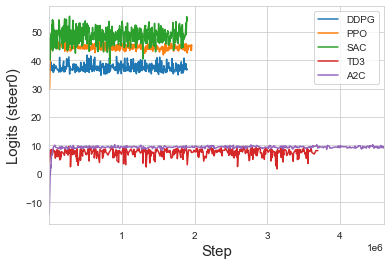

In [7]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="logits/target_class.mean()", hue="legend", data=logits_steer0_df)
ax.set_ylabel('Logits (steer0)', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='upper right')
plt.savefig("./thesis-recreate-figures/reward__steer0_bandits.png", dpi=400)
plt.show()

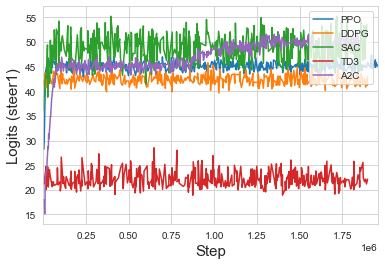

In [8]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="logits/target_class.mean()", hue="legend", data=logits_steer1_df)
ax.set_ylabel('Logits (steer1)', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='upper right')
plt.savefig("./thesis-recreate-figures/reward__steer0_bandits.png", dpi=400)
plt.show()

In [ ]:
logits_off_target_steer0_hist_list = [] 
logits_off_target_steer1_hist_list = [] 

for run in runs:
    hist = run.history(keys=['logits/not_target_class.mean()'])
    hist['legend'] = run.config['algo']
    
    if 'steer0' in run.name:
        logits_off_target_steer0_hist_list.append(hist)
    if 'steer1' in run.name and '2M' in run.name:
        logits_off_target_steer1_hist_list.append(hist)

print(len(logits_steer0_hist_list))

logits_off_steer0_df = pd.concat(logits_off_target_steer0_hist_list, ignore_index=True)  
logits_off_steer1_df = pd.concat(logits_off_target_steer1_hist_list, ignore_index=True) 

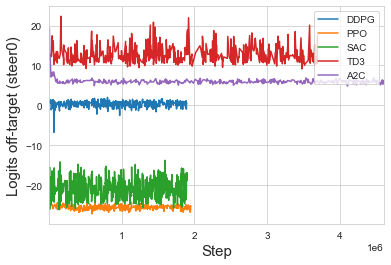

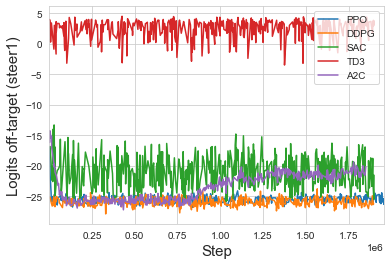

In [11]:
sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="logits/not_target_class.mean()", hue="legend", data=logits_off_steer0_df)
ax.set_ylabel('Logits off-target (steer0)', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='upper right')
plt.savefig("./thesis-recreate-figures/rl/steer0_logits_off_target_bandits.png", dpi=400)
plt.show()

sns.set_style('whitegrid')
ax = sns.lineplot(x="_step", y="logits/not_target_class.mean()", hue="legend", data=logits_off_steer1_df)
ax.set_ylabel('Logits off-target (steer1)', fontsize=15)
ax.set_xlabel('Step', fontsize=15)
ax.margins(x=0)
plt.legend(loc='upper right')
plt.savefig("./thesis-recreate-figures/rl/steer1_logits_off_target_bandits.png", dpi=400)
plt.show()

## RL <a class="anchor" id="third-bullet"></a>